In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def generate_histogram(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins='auto', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [7]:
def summarize_stats(csvfile):
    """
    Summarize the VAP statistics from a CSV file.

    Parameters:
    csvfile (str): Path to the CSV file containing sperm tracking data with a column "VAP".

    """
    try:
        # Load the data from the CSV file
        data = pd.read_csv(csvfile)
    except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
        print(f"Error loading CSV file: {e}")
        return
     # Check if 'VAP' and 'VCL' columns exist
    if 'VAP' not in data.columns or 'VCL' not in data.columns:
        print("Error: The CSV file does not contain 'VAP' and 'VCL' columns.")
        return

    # Extract VAP and VCL values
    vaps = data['VAP'].dropna()  # Drop any NaN values
    vcls = data['VCL'].dropna()  # Drop any NaN values

    if vaps.empty or vcls.empty:
        print("No VAP or VCL data available in the CSV file.")
        return

    # Calculate mean and range for VAP
    mean_vap = np.mean(vaps)
    range_vap = (np.min(vaps), np.max(vaps))

    # Calculate mean and range for VCL
    mean_vcl = np.mean(vcls)
    range_vcl = (np.min(vcls), np.max(vcls))

    # Print summary
    print("Summary of VAP and VCL Statistics:")
    print(f"Average Path Velocity (VAP):")
    print(f"  Mean: {mean_vap:.2f}")
    print(f"  Range: {range_vap[0]:.2f} - {range_vap[1]:.2f}")
    print(f"Curvilinear Velocity (VCL):")
    print(f"  Mean: {mean_vcl:.2f}")
    print(f"  Range: {range_vcl[0]:.2f} - {range_vcl[1]:.2f}")


  # Generate histograms
    generate_histogram(vaps, "Average Path Velocity (VAP)", "VAP (microns/second)")
    generate_histogram(vcls, "Curilinear Velocity (VCl)", "VCL (microns/second)")

Summary of VAP and VCL Statistics:
Average Path Velocity (VAP):
  Mean: 5.13
  Range: 0.00 - 26.29
Curvilinear Velocity (VCL):
  Mean: 5.34
  Range: 0.00 - 27.78


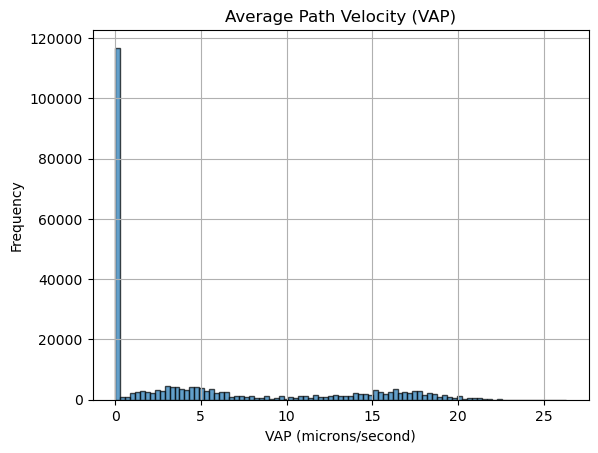

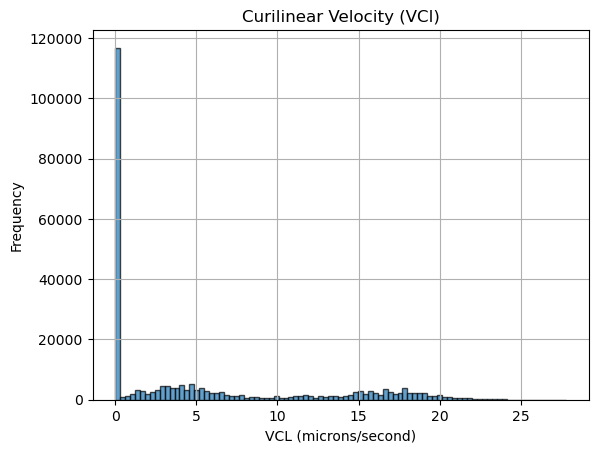

In [8]:
summarize_stats('10X_HD_1024_R1_tracked_withstats.csv')